# Homework 01

**MAE 3120, Spring 2022**

**Caden Gobat**

Note: This submission consists of a Jupyter notebook with the code itself hidden for the sake of readability. Original file/source code is available upon request, or on my GitHub repository for this class: [cgobat/MAE-3120](https://github.com/cgobat/MAE-3120).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import optimize

## 1) Uncertainty and Accuracy

a)

In [2]:
true = 5.0160 # V
data = np.array([5.014, 5.010, 5.039, 5.019, 5.035, 5.030, 5.011, 5.025]) # V

print(f"True value: {true:.4f} V")
print("Data mean:",round(data.mean(),3),"±",round(stats.sem(data),3),"V")
print(f"Precision error: + {round(stats.sem(data),3)} V = {stats.sem(data):.0e} V")
print(f"Sytematic error: + {round(data.mean()-true,3)} V = {data.mean()-true:.0e} V")

True value: 5.0160 V
Data mean: 5.023 ± 0.004 V
Precision error: + 0.004 V = 4e-03 V
Sytematic error: + 0.007 V = 7e-03 V


We see that on average, the recorded data are 0.007 V ($=7\cdot10^{3}$ V) above the true voltage (systematic error). The precision error (standard error in the mean of the data themselves) is ±0.004 V ($=\pm4\cdot10^{3}$ V).

b) All measurements reported in volts ($\text{V}$):

,Measurement,Measurement (sci),Accuracy error,Acc. error (sci),Precision error,Prec. error (sci)
0,5.014,5.014e+00,-0.002,-2e-03,-0.009,-9e-03
1,5.010,5.010e+00,-0.006,-6e-03,-0.013,-1.3e-02
2,5.039,5.039e+00,0.023,2.3e-02,0.016,1.6e-02
3,5.019,5.019e+00,0.003,3e-03,-0.004,-4e-03
4,5.035,5.035e+00,0.019,1.9e-02,0.012,1.2e-02
5,5.030,5.030e+00,0.014,1.4e-02,0.007,7e-03
6,5.011,5.011e+00,-0.005,-5e-03,-0.012,-1.2e-02
7,5.025,5.025e+00,0.009,9e-03,0.002,2e-03


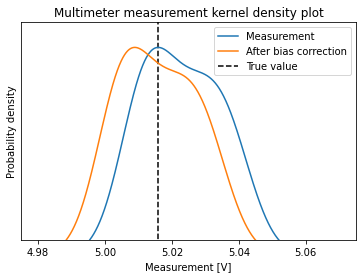

In [3]:
acc_err = data-true
rand_err = (data-data.mean()).round(3)
table = pd.DataFrame({"Measurement":data,
                      "Measurement (sci)":[f"{x:.3e}" for x in data],
                      "Accuracy error":acc_err,
                      "Acc. error (sci)": [f"{x:.1e}" if np.abs(x)>0.01 else f"{x:.0e}" for x in acc_err],
                      "Precision error":rand_err,
                      "Prec. error (sci)":[f"{x:.1e}" if np.abs(x)>0.01 else f"{x:.0e}" for x in rand_err],})
#                       "Acc. err. after bias correction":acc_err-0.007})
# table = table.append(dict(zip(table.columns,[data.mean(),None,acc_err.mean(),None,rand_err.mean(),None])),ignore_index=True)
# print("All measurements reported in volts (V):")
display(table)
table["Measurement"].plot(kind="kde")
(table["Measurement"]-0.007).plot(kind="kde",label="After bias correction")
plt.vlines(true,0,32,linestyle="--",color="k",label="True value")
plt.xlabel("Measurement [V]")
plt.legend()
plt.xlim(4.975,5.075)
plt.ylim(2,31)
plt.yticks([])
plt.ylabel("Probability density")
plt.title("Multimeter measurement kernel density plot")
plt.show()

c) The multimeter could be made more accurate by introducing a bias correction offset of $-0.007\text{ V}$ to eliminate the systematic (average accuracy) error.

d) To be made more precise, we would have to change more fundamental properties of how the instrument is designed and takes measurements. For example, this might be possible by analyzing the internal transient response of the multimeter and changing the sampling window or noise filtering based on these findings. Other possibilities could be increasing the input resistance or changing the internal impedance properties.

## 2) First-order dynamic system (thermistor)

a)

In [4]:
K = 0.11 # mV/K
A = 20
f = 5 # Hz
w = 2*np.pi*f # rad/s
tau = 0.4 # s
phi = np.arctan(-w*tau)
beta = phi/w
print(f"ω =  {w/np.pi:.0f}π rad/s = {w:.2e} rad/s")
T = lambda t : 400 + A*np.sin(w*t)
y = lambda t,omega,tau,K,A,y_0=0 : (y_0 + (omega*tau*K*A)/(omega**2*tau**2+1))*np.exp(-t/tau) + K*A/(np.sqrt(omega**2*tau**2+1))*np.sin(omega*t-np.arctan(omega*tau))
M = lambda omega,tau=tau : (1+(omega**2*tau**2))**-0.5

ω =  10π rad/s = 3.14e+01 rad/s


b)

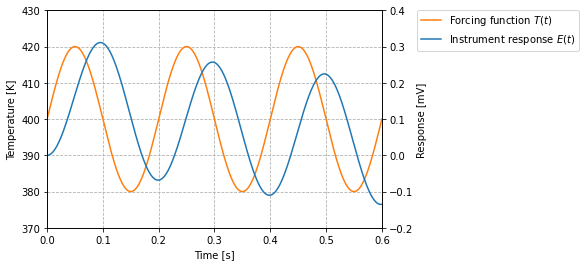

In [5]:
t = np.linspace(0,3/f,600)
fig,ax = plt.subplots()
ax.plot(t,T(t),color="tab:orange",label="Forcing function $T(t)$")
ax.set_ylabel("Temperature [K]")
ax.set_xlabel("Time [s]")
ax.set_xlim(t.min(),t.max())
ax.set_ylim(370,430)
ax.grid(linestyle="--")
ax2 = ax.twinx()
ax2.plot(t,y(t,w,tau,K,A),color="tab:blue",label="Instrument response $E(t)$")
ax2.set_ylabel("Response [mV]")
ax2.set_ylim(-.2,.4)
fig.legend(loc="upper left",bbox_to_anchor=(0.97,.9))
plt.show()

c) & d)

In [6]:
print(f"ϕ(ω)\t= {phi:.1f} rad\t= {phi:.1e} rad")
print(f"β\t= {phi*w:.0f} s\t\t= {phi*w:.1e} s")
print(f"M(ω)\t= {M(w):.2f}\t\t=    {M(w):.0e}")
print(f"ϵ_f(ω)\t= {1-M(w):.2f}\t\t=  {1-M(w):.1e}")

ϕ(ω)	= -1.5 rad	= -1.5e+00 rad
β	= -47 s		= -4.7e+01 s
M(ω)	= 0.08		=    8e-02
ϵ_f(ω)	= 0.92		=  9.2e-01


e)

Well-constrained $\implies||\phi||<0.02\text{ rad}$:
\begin{gather*}
\phi(\omega,\tau) = -\arctan(\omega\tau) \\
||\arctan(\omega\tau)|| = ||\arctan(10\pi\tau)|| < 0.02\text{ rad} \\
||\tau|| < 0.0063\text{ s} = 6.3\cdot10^{-3}\text{ s}
\end{gather*}

In [7]:
print(f"M(10π s⁻¹,0.0063 s) = {M(w,np.tan(0.02)/(10*np.pi)):.2e} = {M(w,np.tan(0.02)/(10*np.pi)):.1f}")

M(10π s⁻¹,0.0063 s) = 1.00e+00 = 1.0


f) $$ \tau = \frac{mC}{h_{sf}A_s} $$
To reduce $\tau$ to make the system's response more faithful, the options are to reduce mass $m$ or increase surface area $A_s$. Because we have a constant density, the mass is given by $m=\rho V=6\pi r^3\rho$. The surface area of the cylinder is $A_s=2\pi r^2+12\pi r^2 = 14\pi r^2$. Therefore, $m\propto r^3$ and $A_s\propto r^2$, meaning that the time constant as a whole goes as $\tau\propto\frac{r^3}{r^2}=r$. Therefore, it is better to reduce the size of the thermistor cylinder if possible, as this will cause a reduction in $\tau$.





## 3) Second-order dynamic system (transducer)

a)

In [8]:
f = 100 # Hz
omega = 2*np.pi*f # rad/s

for zeta,p0 in [(0.1,1),(1,0.1),(2,0.1)]:
    M = lambda ratio : 1/(((1-ratio**2)**2 + (2*zeta*ratio)**2)**0.5)
    ratio = optimize.fsolve(lambda x : 0.99-M(x), p0)
    omega_n = omega/ratio
    print(f"ζ = {zeta:.1f} -> f_n = {omega_n[0]/(2*np.pi):.0f} Hz = {omega_n[0]/(2*np.pi):.1e} Hz")

ζ = 0.1 -> f_n = 71 Hz = 7.1e+01 Hz
ζ = 1.0 -> f_n = 995 Hz = 9.9e+02 Hz
ζ = 2.0 -> f_n = 2626 Hz = 2.6e+03 Hz


b)

To keep dynamic error below 0.01, we must require
that ζ < 0.785 (=7.85e-01), as seen below:


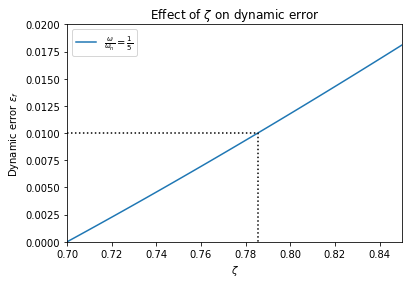

In [9]:
fn = 500 # Hz
ratio = f/fn
M = lambda z : 1/(((1-ratio**2)**2 + (2*z*ratio)**2)**0.5)

zeta_cut = optimize.fsolve(lambda z : 0.99-M(z),1)[0]
print(f"To keep dynamic error below 0.01, we must require\nthat ζ < {zeta_cut:.3f} (={zeta_cut:.2e}), as seen below:")

zspace = np.linspace(0.7,0.85,100)
plt.plot(zspace,1-M(zspace),label=r"$\frac{\omega}{\omega_n}=\frac{1}{5}$")
plt.plot([0.7,zeta_cut,zeta_cut],[0.01,0.01,0],"k:")
plt.xlabel("$\zeta$")
plt.ylabel("Dynamic error $\epsilon_f$")
plt.legend()
plt.xlim(0.7,0.85)
plt.ylim(0,0.02)
plt.title(r"Effect of $\zeta$ on dynamic error")
plt.show()

## 4) Pressure wave (also 2$^\text{nd}$-order)

$$ P(t) = 100000 + 10000\sin(2\pi 100t)+2000\sin(2\pi 10000t) $$

\begin{align*}
K &= 100000\text{ V/Pa} \\
A_1 &= 10000\text{ Pa} \\
A_2 &= 2000\text{ Pa} \\
\omega_1 &= 2\pi\cdot100\text{ s}^{-1} = 200\pi\text{ s}^{-1} \\
\omega_2 &= 2\pi\cdot10000\text{ s}^{-1} = 20000\pi\text{ s}^{-1} \\
\omega_n &= 2\pi\cdot20000\text{ s}^{-1} = 40000\pi\text{ s}^{-1} \\
\zeta &= 0.7
\end{align*}

$$ y_1(t) = \frac{100000\cdot10000 \sin(200\pi t + \phi(200\pi))}{\sqrt{[1-(200\pi/40000\pi)^2]^2 + [2\cdot0.7\cdot200\pi / 40000\pi]^2}}$$

$$ y_2(t) = \frac{100000\cdot2000 \sin(20000\pi t + \phi(20000\pi))}{\sqrt{[1-(20000\pi/40000\pi)^2]^2 + [2\cdot0.7\cdot20000\pi / 40000\pi]^2}}$$

In [10]:
fn = 20000 # Hz
zeta = 0.7 # unitless (damping ratio)
K = 100000 # V/Pa
omega_n = fn*2*np.pi # rad/s

P = lambda t : 100000 + 10000*np.sin(2*np.pi*100*t) + 2000*np.sin(2*np.pi*10000*t)
phi = lambda omega : -np.arctan((2*zeta*omega/omega_n)/(1-(omega/omega_n)**2))
yp = lambda t,K,A,omega,zeta : (K*A*np.sin(omega*t + phi(omega)))/(((1-(omega/omega_n)**2)**2 + (2*zeta*omega/omega_n)**2)**0.5)
M = lambda w,w_n=omega_n,z=zeta : ((1-(w/w_n)**2)**2 + (2*z*w/w_n)**2)**-0.5

a)

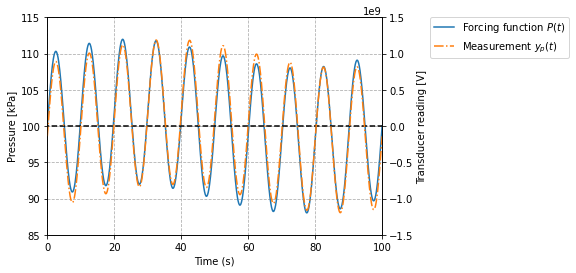

In [11]:
t = np.linspace(0,100,1000)
y1 = yp(t,K,10000,2*np.pi*100,zeta)
y2 = yp(t,K,2000,2*np.pi*10000,zeta)
fig,ax = plt.subplots()
ax.plot(t,P(t)/1000,label="Forcing function $P(t)$")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure [kPa]")
ax.set_xlim(t.min(),t.max())
ax.set_ylim(85,115)
ax2 = ax.twinx()
ax2.plot(t,y1+y2,color="tab:orange",linestyle="-.",label="Measurement $y_p(t)$")
ax2.set_ylim(-1.5e9,1.5e9)
ax.grid(linestyle="--")
ax2.set_ylabel("Transducer reading [V]")
ax2.hlines(0,200,0,color="k",linestyle="--")
fig.legend(loc="upper left",bbox_to_anchor=(1,.9))
plt.show()

b)

The signal appears to be a high-frequency sine wave modulated by a much lower frequency one (i.e., the whole thing oscillates up and down slowly, while there is a more rapid oscillation within this). From a visual inspection, the instrument response matches the morphology of the pressure wave value quite well.

c)

To improve fidelity of the measurements to the actual pressure values, we should seek ways to reduce $\epsilon_f(\omega)=1-M(\omega)$, the dynamic error of the system. To do this, we must make $M(\omega)$ as close to 1 as possible.

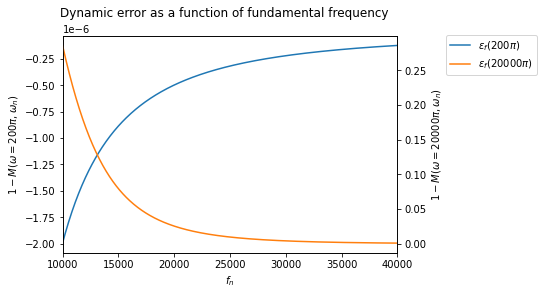

In [12]:
fig,ax = plt.subplots()
test = np.linspace(10000,40000,500)
ax.plot(test,1-M(200*np.pi,2*np.pi*test),label="$\epsilon_f(200\pi)$")
ax.set_xlabel("$f_n$")
ax.set_ylabel("$1-M(\omega=200\pi,\omega_n)$")
ax2 = ax.twinx()
ax2.plot(test,1-M(20000*np.pi,2*np.pi*test),color="tab:orange",label="$\epsilon_f(20000\pi)$")
ax.set_xlim(test.min(),test.max())
ax2.set_ylabel("$1-M(\omega=20000\pi,\omega_n)$")
fig.suptitle("Dynamic error as a function of fundamental frequency")
fig.legend(loc="upper left",bbox_to_anchor=(1,0.9))
plt.show()

The error corresponding to the lower frequency ($f=200$ Hz) is negative and about 5-6 orders of magnitude smaller than the error corresponding to the higher frequency ($f=20000$ Hz), which has a positive sign. The positive error (orange), $\epsilon_f(20000\pi)$, decreases (approaches 0) as $f_n\to\infty$, while the negative error (blue), $\epsilon_f(200\pi)$, increases (also approaches 0) as $f_n\to\infty$. Therefore, we can surmise that increasing the fundamental frequency of our instrument will reduce the overall dynamic error and thus increase response fidelity.